# Stimulation Visualizer

This notebook contains code for ...

> Author: Justin Campbell  
> Contact: justin.campbell@hsc.utah.edu  
> Version: 02/13/24

### Implementation

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [356]:
def simulateStim(gamma, A = 1, n_bursts = 8, PW = 250, AC_IPI = 100, DC = 0.5, savestr = None):
    '''
    Simulate a BLAES signal with the given parameters.
    
    Inputs:
    - gamma (int): the gamma-frequency component of stim (Hz)
    - amp (int): the amplitude of the signal (mA) [default = 1]
    - n_bursts (int): the number of bursts (theta component) [default = 8]
    - PW (int): the pulse width (us) [default = 250]
    - AC_IPI (int): the anode-cathode inter-pulse interval (us) [default = 100]
    - DC (float): the duty cycle (on/off time ratio) [default = 0.5]
    - savestr (str): the path to save the figure [default = None]
    
    Outputs:
    - None
    '''
    
    # Set the parameters
    samples = 1e6                                                # number of samples / us
    burst_duration = int((1 / n_bursts) * DC * samples)          # burst duration (samples / us)
    IBI = int(1 / n_bursts * samples) / 2                        # inter-burst interval (samples / us)
    IPI = int(1 / gamma * samples)                               # inter-pulse interval (samples / us)

    # Initialize the signal
    t = np.arange(0, 1, 1/samples) # time vector (s)
    x = np.zeros_like(t) # signal vector

    # Simulate stimulation
    for i in range(0, len(t), int(1 / n_bursts * samples)):
        for j in np.arange(0, burst_duration+1, IPI):
            x[i+j:i+j+PW] = amp
            x[i+j+AC_IPI:i+j+PW+AC_IPI] = -amp

    # Figure parameters
    fig, ax = plt.subplots(figsize=(9, 3))

    # Plotting
    plt.plot(t, x, color = '#263478')
    for i in range(0, len(t), int(1 / n_bursts * samples)):
        plt.axvspan(i/samples, (i+burst_duration)/samples, color='#263478', alpha=0.05)

    # Figure aeshetics
    plt.xlabel('Time (ms)')
    plt.xticks(np.arange(0, 1.1, 0.1), np.arange(0, 1100, 100))
    plt.xlim(-0.0625, 1.0625)
    plt.ylabel('Amplitude (mA)')
    plt.yticks([-2, -1, 0, 1, 2])
    plt.ylim(-2.25, 2.25)
    plt.title('BLAES Simulation', y = 1.1)
    plt.legend(bbox_to_anchor=(1.2,1.05), title = 'Parameters', 
        labels = [f'mA = {amp}\n$\\gamma$ = {gamma}\n$\\theta$ = {n_bursts}\nPW = {PW/1e3:.2f}\nIPI = {IPI/1e3:.2f}\nIBI = {IBI/1e3:.2f}\nDC = {DC:.2f}'])
    plt.axvspan(0, 1, color='gray', alpha=0.05)
    sns.despine(top = True, right = True)
    
    # Export
    if savestr:
        plt.savefig('/Users/justincampbell/Desktop/' + savestr + '.png', bbox_inches = 'tight', dpi = 1200)

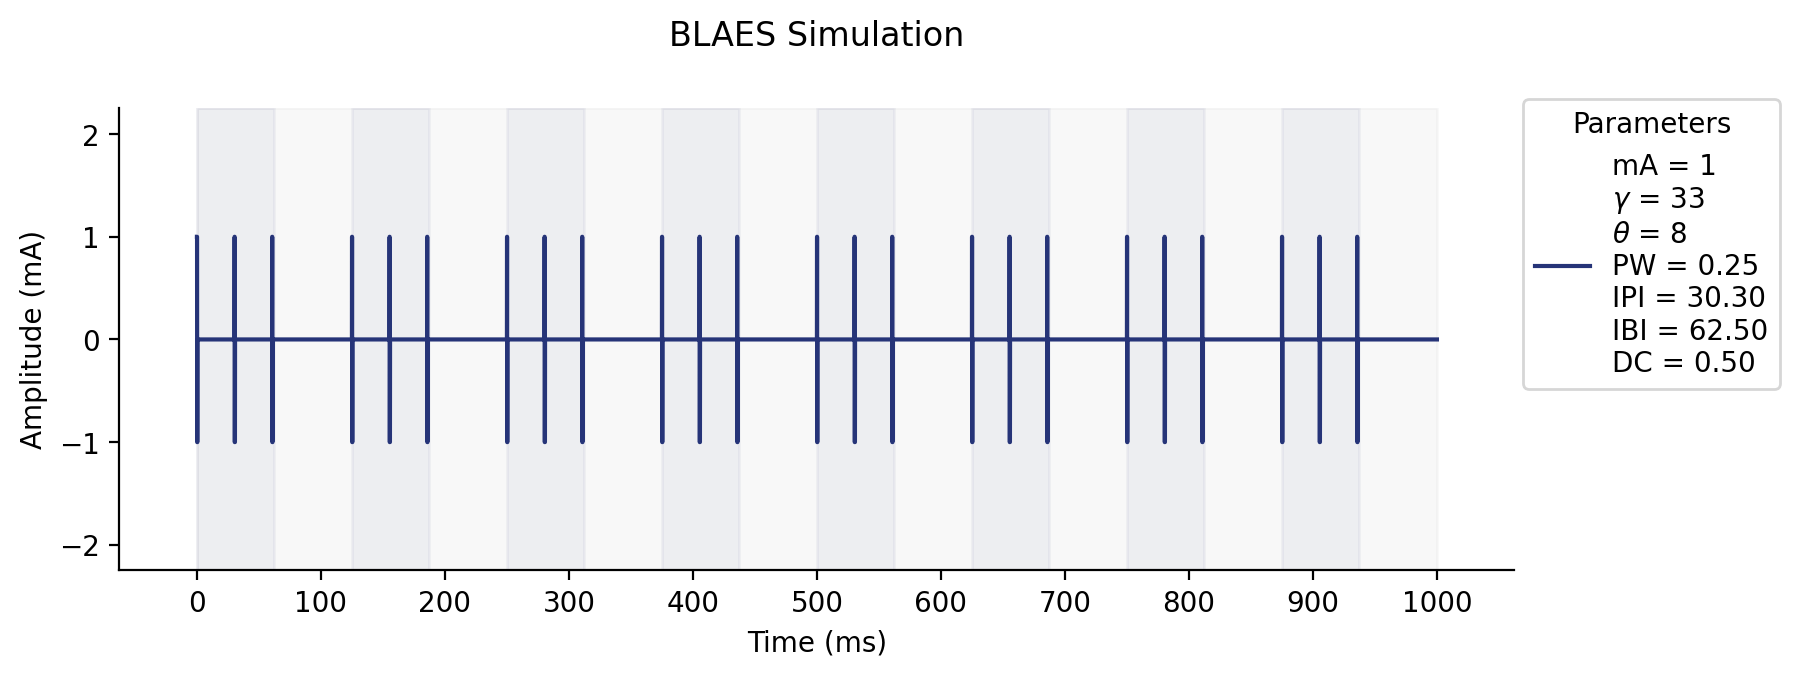

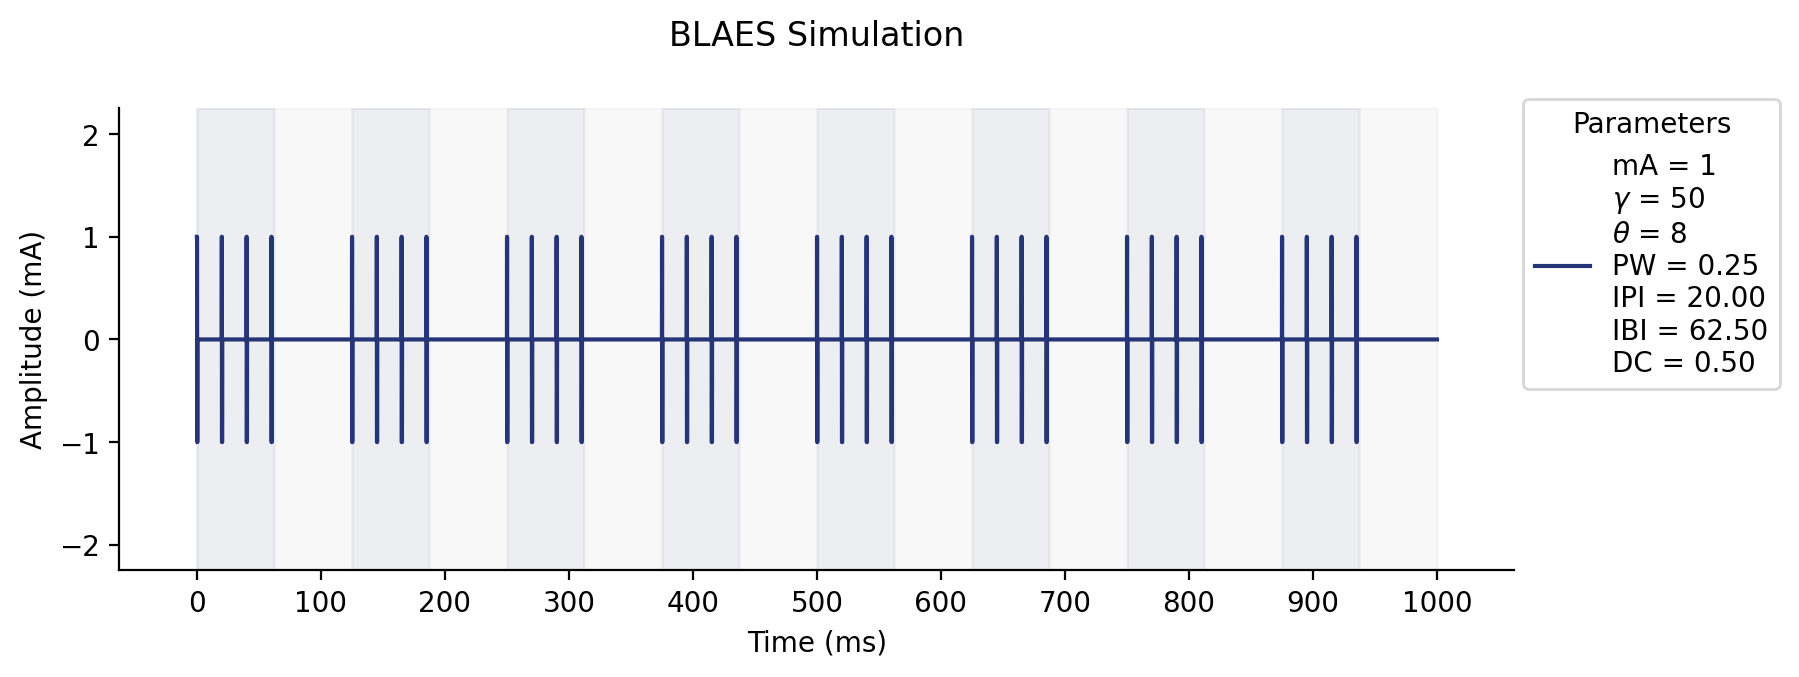

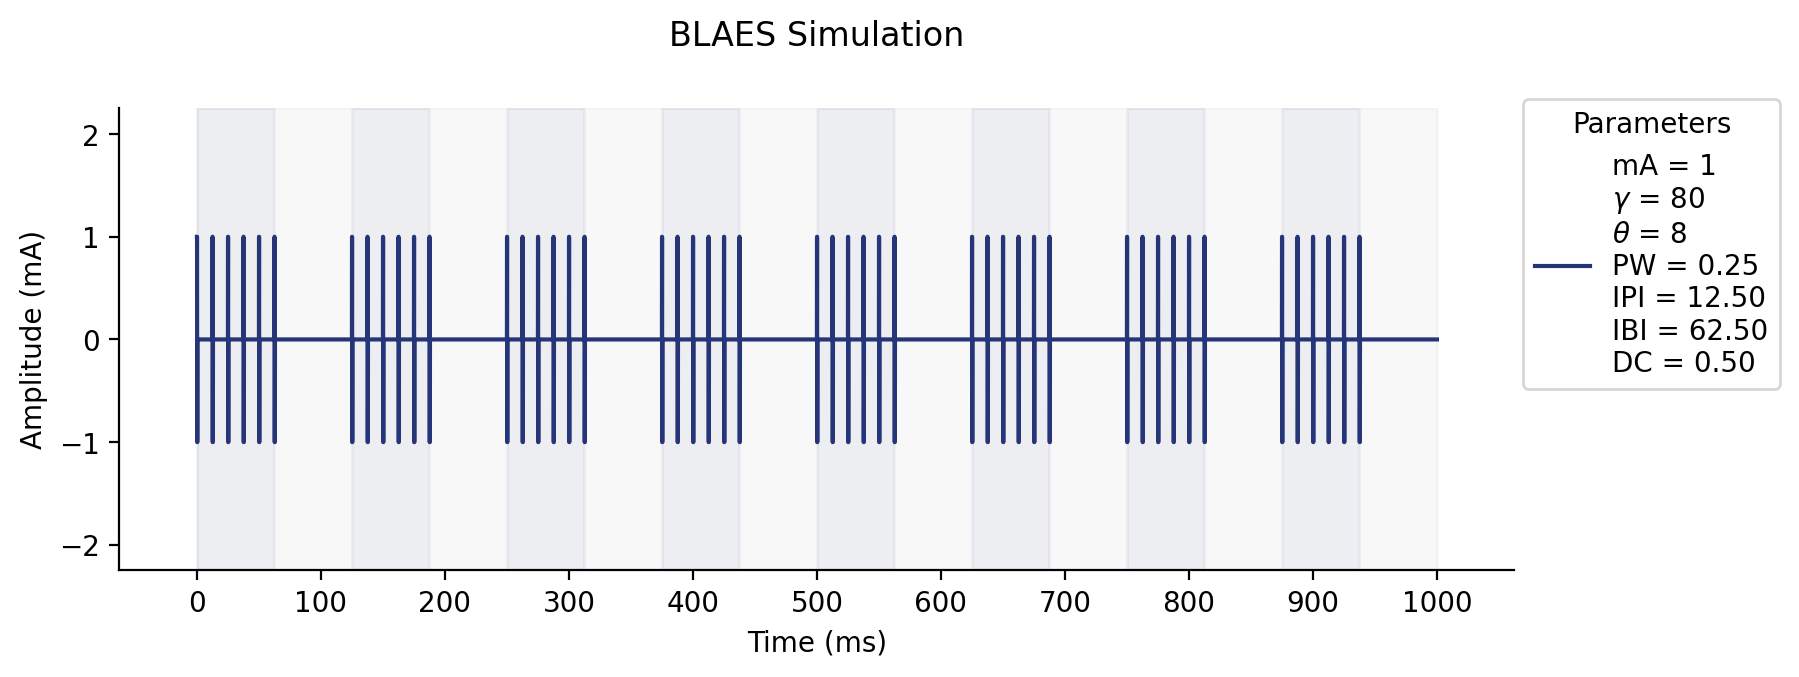

In [357]:
# Run for candidate gamma frequencies
for gamma in [33, 50, 80]:
    simulateStim(gamma = gamma, savestr = f'BLAES_{gamma}Hz')

In [359]:
burst_duration

62